In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels
%matplotlib inline

In [2]:
data = pd.read_csv('data3a.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
y    100 non-null int64
x    100 non-null float64
f    100 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
data['f_int'] = (data.f=='T').astype(int)

In [5]:
data['x^2'] = (data.x)**2
data['x^3'] = (data.x)**3
data['x^4'] = (data.x)**4
data['x^5'] = (data.x)**5
data['x^6'] = (data.x)**6

In [6]:
data.x_c = sm.add_constant(data[['x','x^2','x^3','x^4','x^5','x^6']])

In [7]:
model = sm.GLM(data.y,data.x_c,family=sm.families.Poisson())

In [8]:
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       93
Model Family:                 Poisson   Df Model:                            6
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -232.58
Date:                Tue, 24 Jan 2017   Deviance:                       79.383
Time:                        14:27:14   Pearson chi2:                     76.7
No. Iterations:                   100                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       8185.6246   7764.770      1.054      0.292     -7033.045  2.34e+04
x          -4980.3818   4833.706     -1.030      0.303     -1.45e+04  4493.507
x^2         1251.8054   1245.517      1.005      0.315     -1189.364  3692.975
x^3         -166.4112    170.082     -0.978      0.328      -499.767   166.944
x^4           12.3450     12.985      0.951      0.342       -13.105    37.795
x^5           -0.4847      0.526     -0.922      0.356        -1.515     0.545
x^6            0.0079      0.009      0.893      0.372        -0.009     0.025
==============================================================================
"""

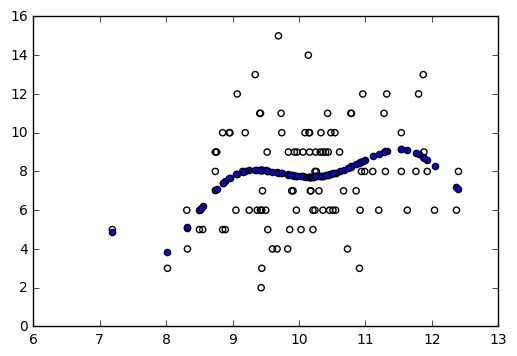

In [9]:
x = np.arange(min(data.x),max(data.x),1.)
plt.scatter(data.x,data.y,facecolor='none')
plt.scatter(data.x,result.predict(data.x_c))

In [10]:
model = sm.GLM(data.y,data.x_c['const'],family=sm.families.Poisson())

In [11]:
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       99
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -237.64
Date:                Tue, 24 Jan 2017   Deviance:                       89.507
Time:                        14:27:15   Pearson chi2:                     87.1
No. Iterations:                     7                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.0580      0.036     57.586      0.000         1.988     2.128
==============================================================================
"""

/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  if __name__ == '__main__':


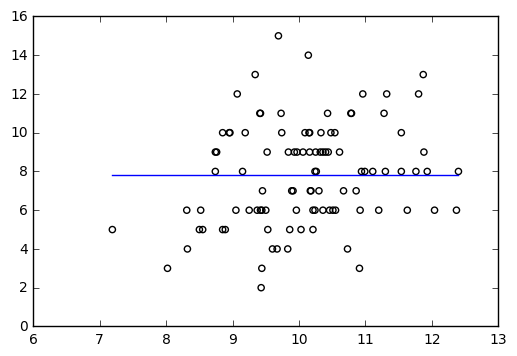

In [12]:
x = data.sort_index(by='x').x
plt.scatter(data.x,data.y,facecolor='none')
plt.plot(x,result.predict(data.x_c['const']))

In [13]:
data.x_c = sm.add_constant(data.f_int)
model = sm.GLM(data.y,data.x_c,family=sm.families.Poisson())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -237.63
Date:                Tue, 24 Jan 2017   Deviance:                       89.475
Time:                        14:27:15   Pearson chi2:                     87.1
No. Iterations:                     7                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.0516      0.051     40.463      0.000         1.952     2.151
f_int          0.0128      0.071      0.179      0.858        -0.127     0.153
==============================================================================
"""

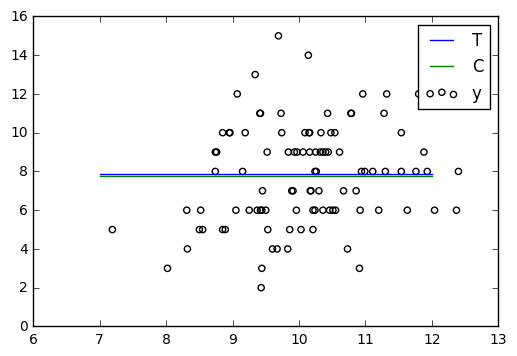

In [14]:
x = np.arange(7,13,1.0)
plt.scatter(data.x,data.y,facecolor='none')
plt.plot(x,np.exp(2.0516+0.0128)*np.ones(x.shape[0]),label='T')
plt.plot(x,np.exp(2.0516)*np.ones(x.shape[0]),label='C')
plt.legend()

In [15]:
data.x_c = sm.add_constant(data.x)
model = sm.GLM(data.y,data.x_c,family=sm.families.Poisson())
result = model.fit()

In [16]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -235.39
Date:                Tue, 24 Jan 2017   Deviance:                       84.993
Time:                        14:27:15   Pearson chi2:                     83.8
No. Iterations:                     7                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.2917      0.364      3.552      0.000         0.579     2.005
x              0.0757      0.036      2.125      0.034         0.006     0.145
==============================================================================
"""

/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  if __name__ == '__main__':


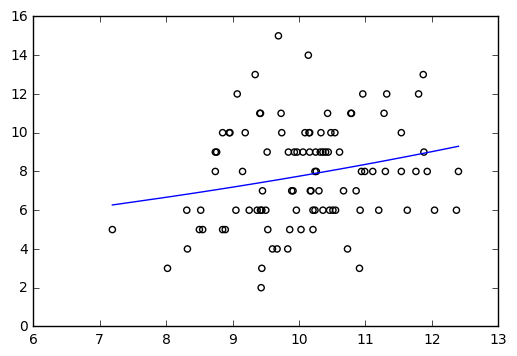

In [17]:
x = data.x_c.sort_index(by='x')
plt.scatter(data.x,data.y,facecolor='none')
plt.plot(x.x,result.predict(x))

In [18]:
data.x_c = sm.add_constant(data[['x','f_int']])
model = sm.GLM(data.y,data.x_c,family=sm.families.Poisson())

In [19]:
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                 Poisson   Df Model:                            2
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -235.29
Date:                Tue, 24 Jan 2017   Deviance:                       84.808
Time:                        14:27:16   Pearson chi2:                     83.8
No. Iterations:                     7                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.2631      0.370      3.417      0.001         0.539     1.988
x              0.0801      0.037      2.162      0.031         0.007     0.153
f_int         -0.0320      0.074     -0.430      0.667        -0.178     0.114
==============================================================================
"""

/home/kyohei/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  if __name__ == '__main__':


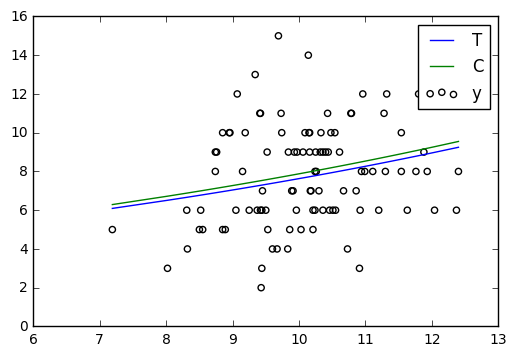

In [20]:
x = data.x_c.sort_index(by='x')
plt.scatter(data.x,data.y,facecolor='none')
plt.plot(x.x,np.exp(1.2631+0.0801*x.x-0.0320),label='T')
plt.plot(x.x,np.exp(1.2631+0.0801*x.x),label='C')
plt.legend()

In [21]:
max_loglikelihood_x = np.sum(stats.poisson.logpmf(data.y,np.exp(data.x*0.0757+1.2917)))

In [22]:
D = -2*max_loglikelihood_x
D

470.77260776280127

In [23]:
likelihood_full = np.sum(stats.poisson.logpmf(data.y,data.y))

In [24]:
devience = likelihood_full*(-2)
print(likelihood_full)
print(devience)

-192.889752524
385.779505049


In [25]:
residual_devience_xmodel = D - devience
residual_devience_xmodel

84.993102713809378

In [26]:
log_likelihood = np.sum(stats.poisson.logpmf(data.y,data.y))
devience = -2*log_likelihood
AIC = devience + 2*100
summary = [[['full'],100,log_likelihood,devience,0.0,AIC]]

In [27]:
data.x_c = sm.add_constant(data.x)
model = sm.GLM(data.y,data.x_c['const'],family=sm.families.Poisson())
result = model.fit()
summary.append([['const'],result.df_model+1,result.llf,-2*result.llf,result.deviance,result.aic])

In [28]:
import itertools
columns = ['f_int','x']
for i in range(2):
    for a in itertools.combinations(columns,i+1):
        a_array = a
        data.x_c = sm.add_constant(data[list(a)])
        model = sm.GLM(data.y,data.x_c,family=sm.families.Poisson())
        result = model.fit()
        summary.append([list(a),result.df_model+1,result.llf,-2.0*result.llf,result.deviance,result.aic])
result_columns = ['model','k','logL','deviance','residual_deviance','AIC']
result_table = pd.DataFrame(summary,columns=result_columns)

In [29]:
result_table.head()

,model,k,logL,deviance,residual_deviance,AIC
0,[full],100,-192.889753,385.779505,0.000000,585.779505
1,[const],1,-237.643221,475.286443,89.506938,477.286443
2,[f_int],2,-237.627257,475.254514,89.475009,479.254514
3,[x],2,-235.386251,470.772502,84.992996,474.772502
4,"[f_int, x]",3,-235.293719,470.587438,84.807933,476.587438


In [30]:
np.random.seed(2)
y = np.random.poisson(8,50)
x = np.random.uniform(-2,2,50)
data = pd.DataFrame(np.array([y,x]).T,columns=['y','x'])

In [31]:
data.x_c = sm.add_constant(data.x)
model = sm.GLM(data.y,data.x_c,family=sm.families.Poisson())

In [32]:
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   50
Model:                            GLM   Df Residuals:                       48
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -123.68
Date:                Tue, 24 Jan 2017   Deviance:                       54.666
Time:                        14:27:17   Pearson chi2:                     54.4
No. Iterations:                     7                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.0754      0.051     40.708      0.000         1.975     2.175
x             -0.0417      0.046     -0.913      0.361        -0.131     0.048
==============================================================================
"""

In [33]:
result.aic

251.36653598406369

In [34]:
model = sm.GLM(data.y,data.x_c['const'],family=sm.families.Poisson())
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                   50
Model:                            GLM   Df Residuals:                       49
Model Family:                 Poisson   Df Model:                            0
Link Function:                    log   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -124.10
Date:                Tue, 24 Jan 2017   Deviance:                       55.497
Time:                        14:27:17   Pearson chi2:                     54.7
No. Iterations:                     7                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          2.0669      0.050     41.078      0.000         1.968     2.165
==============================================================================
"""

In [35]:
result.aic

250.197522947187

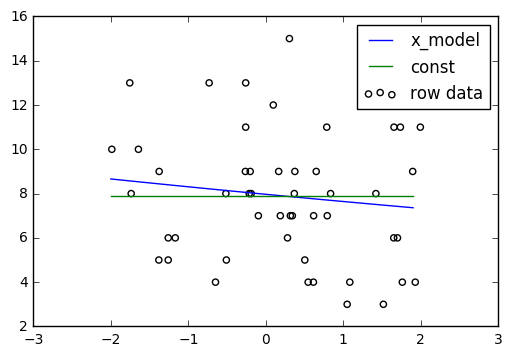

In [36]:
x = np.arange(-2,2,0.1)
plt.scatter(data.x,data.y,facecolor='none',label='row data')
plt.plot(x,np.exp(2.0754-0.0417*x),label='x_model')
plt.plot(x,np.exp(2.0669)*np.ones(x.shape[0]),label='const')
plt.legend()

In [37]:
x = np.arange(1.8,2.2,0.01)
log_likelihoods = np.array([np.sum(stats.poisson.logpmf(data.y,np.exp(i))) for i in x])

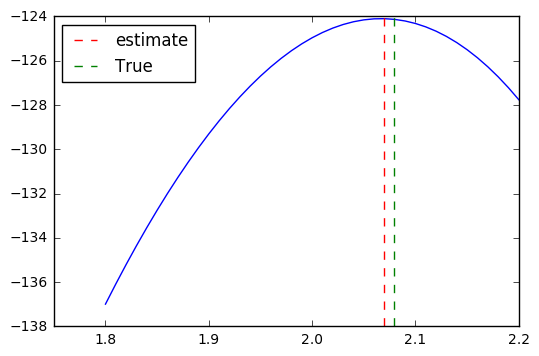

In [38]:
plt.plot(x,log_likelihoods)
plt.axvline(x[np.argmax(log_likelihoods)],c='r',ls='--',label='estimate')
plt.axvline(np.log(8.),c='g',ls='--',label='True')
plt.legend(loc='upper left')

In [39]:
test_data = np.random.poisson(8,[200,50])

In [40]:
test_data.shape

(200, 50)

In [41]:
llh_test = np.array([np.sum(stats.poisson.logpmf(test,np.exp(2.0669))) for test in test_data])

In [42]:
llh_test.shape

(200,)

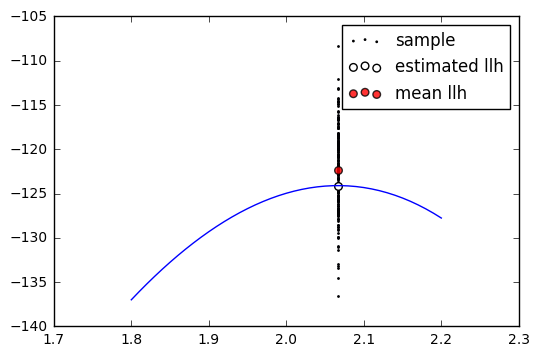

In [43]:
plt.plot(x,log_likelihoods)
plt.scatter(np.ones(llh_test.shape)*2.0669,llh_test,s=1,label='sample')
plt.scatter(2.0669,-124.1,s=30,c='w',label='estimated llh')
plt.scatter(2.0669,llh_test.mean(),c='r',s=30,alpha=0.8,label='mean llh')
plt.legend()

In [44]:
np.random.seed(5)
y_ob = np.random.poisson(8,[12,50])
const = np.ones(50)

predict_data = np.random.poisson(8,[12,200,50])

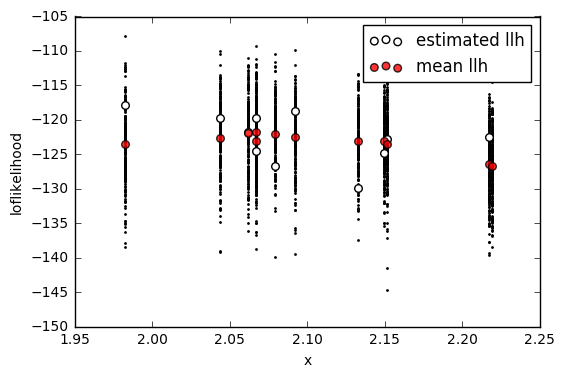

In [46]:
llh_ob = []
param_ob = []
llh_mean = []
for i in range(12):
    model = sm.GLM(y_ob[i],const,family=sm.families.Poisson())
    result = model.fit()
    
    llh_ob.append(result.llf)
    param_ob.append(result.params[0])
    
    llh_predict = np.array([np.sum(stats.poisson.logpmf(test,np.exp(result.params[0]))) for test in predict_data[i]])
    llh_mean.append(llh_predict.mean())
    plt.scatter(np.ones(llh_predict.shape[0])*result.params[0],llh_predict,s=1,c='b')

plt.scatter(param_ob,llh_ob,facecolor='w',s=30,label='estimated llh')
plt.scatter(param_ob,llh_mean,c='r',alpha=0.8,s=30,label='mean llh')
plt.xlabel('x')
plt.ylabel('loflikelihood')
plt.legend()

In [47]:
np.random.seed(2)
y_ob = np.random.poisson(8,[100,50])
x_ob = np.random.uniform(-2,2,[100,50])
const = np.ones(50)

predict_data = np.random.poisson(8,[100,200,50])

In [48]:
llh_ob = []
llh_mean = []
for i in xrange(100):
    model = sm.GLM(y_ob[i],const,sm.families.Poisson())
    result = model.fit()
    
    llh_ob.append(result.llf)
    
    llh_predict = np.array([np.sum(stats.poisson.logpmf(x,np.exp(result.params[0])))
                            for x in predict_data[i]])
    llh_mean.append(llh_predict.mean())
bias = np.array(llh_ob) - np.array(llh_mean)

1.04502441668


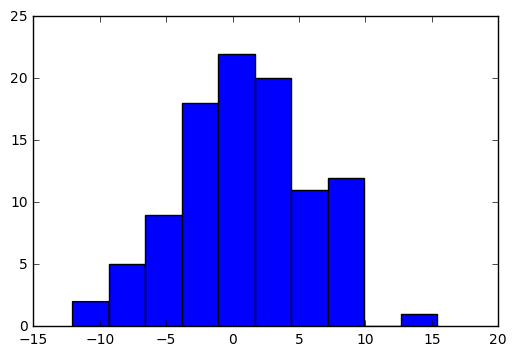

In [49]:
plt.hist(bias)
print(bias.mean())

In [51]:
np.random.seed(3)
y_ob = np.random.poisson(8,[200,50])
x_ob = np.random.uniform(-2,2,[200,50])
x_c = np.ones(50)

In [53]:
llf_difference = []
for i in xrange(200):
    model = sm.GLM(y_ob[i],x_c,family=sm.families.Poisson())
    result = model.fit()
    llf_const = result.llf
    
    model = sm.GLM(y_ob[i],np.array([x_ob[i],x_c]).T,family=sm.families.Poisson())
    result = model.fit()
    llf_x = result.llf
    
    llf_difference.append(llf_x - llf_const)

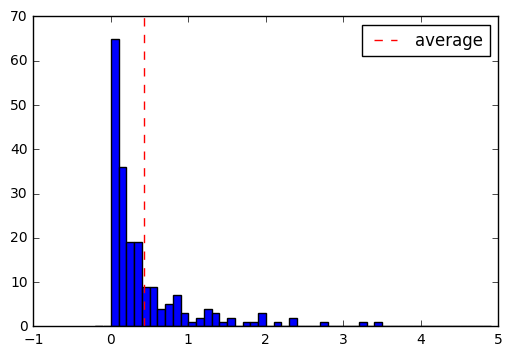

In [55]:
plt.hist(llf_difference,bins=np.arange(-0.2,5.0,0.1))
plt.axvline(np.mean(llf_difference),c='r',ls='--',label='average')
plt.legend(loc='upper right')

In [57]:
y_ob = np.random.poisson(8,[200,50])
x_ob = np.random.uniform(-2,2,[200,50])
const = np.ones(50)

y_es = np.random.poisson(8,[200,200,50])
x_es = np.random.uniform(-2,2,[200,200,50])

In [59]:
mean_llh_const = []
bias_const = []

mean_llh_x = []
bias_x = []

for i in xrange(200):
    model = sm.GLM(y_ob[i],const,family=sm.families.Poisson())
    result = model.fit()
    param = result.params[0]
    
    llh_const = np.array([np.sum(stats.poisson.logpmf(test,np.exp(param))) for test in y_es[i]])
    mean_llh_const.append(llh_const.mean())
    bias_const.append(result.llf - llh_const.mean())
    
    model = sm.GLM(y_ob[i],np.array([x_ob[i],const]).T,family=sm.families.Poisson())
    result = model.fit()
    beta1, beta2 = result.params
    
    llh_x = np.array([np.sum(stats.poisson.logpmf(test_y,np.exp(beta1*test_x+beta2))) for test_y,test_x in 
                     zip(y_es[i],x_es[i])])
    mean_llh_x.append(llh_x.mean())
    bias_x.append(result.llf - llh_x.mean())

In [60]:
difference_ave = np.array(mean_llh_x) - np.array(mean_llh_const)

-0.564110207296


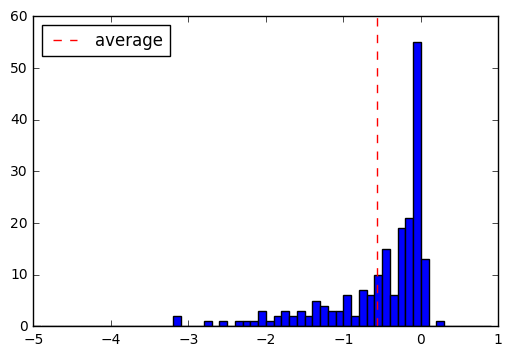

In [61]:
plt.hist(difference_ave,bins=np.arange(-5,1,0.1))
plt.axvline(difference_ave.mean(),ls='--',c='r',label='average')
plt.legend(loc='upper left')
print(difference_ave.mean())

In [62]:
difference_bias = np.array(bias_x) - np.array(bias_const)

1.09275606371


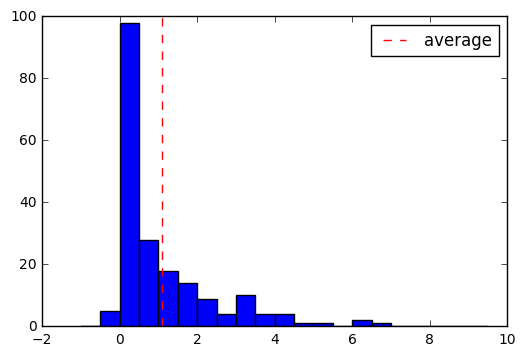

In [63]:
plt.hist(difference_bias,bins=np.arange(-1,10,0.5))
plt.axvline(difference_bias.mean(),ls='--',c='r',label='average')
plt.legend(loc='upper right')
print(difference_bias.mean())